# Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
%matplotlib inline

# Global Variable Declaration/Misc

In [146]:
regex = re.compile('[@_!#$%^&*()<>?/\|}{~:]') 

#The features we'll keep in the ultimate dataframe
ultimate_features = ['tconst',  'start_year', 'runtime_minutes', 'title_CLEANED', 'averagerating',
                     'numvotes', 'directors', 'nconst', 'category', 'release_date', 'domestic_gross',
                     'production_budget','worldwide_gross', 'primary_name', 'genres_CLEANED', 'Action', 'Animation', 
                     'Comedy', 'Romance', 'Drama', 'Thriller', 'Western', 'Crime', 'Mystery', 'Sci-Fi', 'Fantasy',
                     'Horror', 'Adventure', 'Music', 'Biography', 'Sport', 'Family', 'War', 'History', 'Musical', 
                     'Documentary', 'News']

money = ['production_budget','domestic_gross','worldwide_gross']

# Methods/Functions

In [72]:
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Load Data

In [5]:
df_budgets = pd.read_csv('data/tn.movie_budgets.csv.gz') # GROSS & NAMES
df_imdb_basics = pd.read_csv('data/imdb.title.basics.csv.gz') # GENRES & NAMES
df_imdb_ratings = pd.read_csv('data/imdb.title.ratings.csv.gz') # T constant #n constant #rating
df_imdb_name = pd.read_csv('data/imdb.name.basics.csv.gz') # director/actor names, # n constant, # t constant
df_imdb_crew = pd.read_csv('data/imdb.title.crew.csv.gz') # Director n constant, t constant 
df_imdb_principals = pd.read_csv('data/imdb.title.principals.csv.gz')
df_tmdb = pd.read_csv('data/tmdb.movies.csv.gz') # POPULAITY, NAMES
df_rt_info = pd.read_csv('data/rt.movie_info.tsv.gz', delimiter = '\t') # Director names

# Visualize/Explore Data

### <span style='color:red'>------BUDGETS</span>

In [17]:
print(df_budgets.shape, '\n')
print(df_budgets.info())
df_budgets.head()

(5782, 7) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 7 columns):
id                   5782 non-null int64
release_date         5782 non-null object
movie                5782 non-null object
production_budget    5782 non-null object
domestic_gross       5782 non-null object
worldwide_gross      5782 non-null object
title_CLEANED        5782 non-null object
dtypes: int64(1), object(6)
memory usage: 316.3+ KB
None


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,title_CLEANED
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",avatar
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",pirates of the caribbean on stranger tides
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",dark phoenix
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",avengers age of ultron
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",star wars ep viii the last jedi


### <span style='color:red'>------IMDB_BASICS</span>

In [22]:
print(df_imdb_basics.shape, '\n')
print(df_imdb_basics.info())
df_imdb_basics.head()

(146144, 7) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 7 columns):
tconst             146144 non-null object
primary_title      146144 non-null object
original_title     146123 non-null object
start_year         146144 non-null int64
runtime_minutes    114405 non-null float64
genres             140736 non-null object
title_CLEANED      146144 non-null object
dtypes: float64(1), int64(1), object(5)
memory usage: 7.8+ MB
None


,tconst,primary_title,original_title,start_year,runtime_minutes,genres,title_CLEANED
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",sunghursh
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",ashad ka ek din
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,the other side of the wind
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",sabse bada sukh
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",la telenovela errante


### <span style='color:red'>------IMDB_RATING</span>

In [8]:
print(df_imdb_ratings.shape, '\n')
print(df_imdb_ratings.info())
df_imdb_ratings.head()

(73856, 3) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
tconst           73856 non-null object
averagerating    73856 non-null float64
numvotes         73856 non-null int64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB
None


,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


### <span style='color:red'>------IMDB_NAME</span>

In [9]:
print(df_imdb_name.shape, '\n')
print(df_imdb_name.info())
df_imdb_name.head()

(606648, 6) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606648 entries, 0 to 606647
Data columns (total 6 columns):
nconst                606648 non-null object
primary_name          606648 non-null object
birth_year            82736 non-null float64
death_year            6783 non-null float64
primary_profession    555308 non-null object
known_for_titles      576444 non-null object
dtypes: float64(2), object(4)
memory usage: 27.8+ MB
None


,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"


### <span style='color:red'>------IMDB_CREW</span>

In [10]:
print(df_imdb_crew.shape, '\n')
print(df_imdb_crew.info())
df_imdb_crew.head()

(146144, 3) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 3 columns):
tconst       146144 non-null object
directors    140417 non-null object
writers      110261 non-null object
dtypes: object(3)
memory usage: 3.3+ MB
None


,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943


### <span style='color:red'>------IMDB_PRINCIPALS</span>

In [11]:
print(df_imdb_principals.shape, '\n')
print(df_imdb_principals.info())
df_imdb_principals.head()

(1028186, 6) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028186 entries, 0 to 1028185
Data columns (total 6 columns):
tconst        1028186 non-null object
ordering      1028186 non-null int64
nconst        1028186 non-null object
category      1028186 non-null object
job           177684 non-null object
characters    393360 non-null object
dtypes: int64(1), object(5)
memory usage: 47.1+ MB
None


,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN
3,tt0323808,10,nm0059247,editor,NaN,NaN
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"


# Clean Data
(Parsing the names of movies to be joined later)

    -df_budgets
    -df_imdb_basics
    -df_tmdb

### <span style='color:red'>------BUDGETS</span>

In [16]:
df_budgets['title_CLEANED'] = df_budgets['movie'].apply(lambda x: x.lower())
df_budgets['title_CLEANED'] = df_budgets['title_CLEANED'].apply(lambda x: re.sub('[@_!#$%^&*().<>?/\|}{~:]', '', x))

### <span style='color:red'>------IMDB_BASICS</span>

In [21]:
df_imdb_basics['title_CLEANED'] = df_imdb_basics['original_title'].apply(lambda x: x.lower() if type(x) == str else '')
df_imdb_basics['title_CLEANED'] = df_imdb_basics['title_CLEANED'].apply(lambda x: re.sub('[@_!#$%^&*().<>?/\|}{~:]', '', x))

# Merge Data
(Merging the data by T constant values)

In [39]:
df_basics_ratings_crew_principals = pd.merge(df_imdb_basics, df_imdb_ratings,  on="tconst")
df_basics_ratings_crew_principals = pd.merge(df_basics_ratings_crew_principals, df_imdb_crew,  on="tconst")
df_basics_ratings_crew_principals = pd.merge(df_basics_ratings_crew_principals, df_imdb_principals,  on="tconst")
print(df_basics_ratings_crew_principals.shape, '\n')
print(df_basics_ratings_crew_principals.info())
df_basics_ratings_crew_principals.head()

(629755, 16) 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 629755 entries, 0 to 629754
Data columns (total 16 columns):
tconst             629755 non-null object
primary_title      629755 non-null object
original_title     629755 non-null object
start_year         629755 non-null int64
runtime_minutes    567802 non-null float64
genres             624615 non-null object
title_CLEANED      629755 non-null object
averagerating      629755 non-null float64
numvotes           629755 non-null int64
directors          626240 non-null object
writers            558935 non-null object
ordering           629755 non-null int64
nconst             629755 non-null object
category           629755 non-null object
job                124945 non-null object
characters         248129 non-null object
dtypes: float64(2), int64(3), object(11)
memory usage: 81.7+ MB
None


,tconst,primary_title,original_title,start_year,runtime_minutes,genres,title_CLEANED,averagerating,numvotes,directors,writers,ordering,nconst,category,job,characters
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",sunghursh,7.0,77,nm0712540,"nm0023551,nm1194313,nm0347899,nm1391276",10,nm0006210,composer,NaN,NaN
1,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",sunghursh,7.0,77,nm0712540,"nm0023551,nm1194313,nm0347899,nm1391276",1,nm0474801,actor,NaN,"[""Kundan S. Prasad"",""Bajrangi""]"
2,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",sunghursh,7.0,77,nm0712540,"nm0023551,nm1194313,nm0347899,nm1391276",2,nm0904537,actress,NaN,"[""Munni"",""Laila-E-Aasmaan""]"
3,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",sunghursh,7.0,77,nm0712540,"nm0023551,nm1194313,nm0347899,nm1391276",3,nm0756379,actor,NaN,"[""Ganeshi N. Prasad""]"
4,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",sunghursh,7.0,77,nm0712540,"nm0023551,nm1194313,nm0347899,nm1391276",4,nm0474876,actor,NaN,"[""Dwarka N. Prasad""]"


(Merging the data by T constant values)

In [73]:
df_final = pd.merge(df_basics_ratings_crew_principals, df_budgets,  on="title_CLEANED")
df_final = pd.merge(df_final, df_imdb_name,  on="nconst")
print(df_final.shape, '\n')
print(df_final.info())

(26024, 27) 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26024 entries, 0 to 26023
Data columns (total 27 columns):
tconst                26024 non-null object
primary_title         26024 non-null object
original_title        26024 non-null object
start_year            26024 non-null int64
runtime_minutes       25127 non-null float64
genres                25974 non-null object
title_CLEANED         26024 non-null object
averagerating         26024 non-null float64
numvotes              26024 non-null int64
directors             25977 non-null object
writers               25104 non-null object
ordering              26024 non-null int64
nconst                26024 non-null object
category              26024 non-null object
job                   8726 non-null object
characters            10534 non-null object
id                    26024 non-null int64
release_date          26024 non-null object
movie                 26024 non-null object
production_budget     26024 non-null object


In [130]:
#primary_profession, known_for_titles, birth_year, death_year, ordering, writers
df_final.columns

df_final.known_for_titles[0:10]

0    tt0132347,tt0110475,tt0113855,tt0120611
1    tt0356470,tt0361696,tt0380623,tt0306841
2    tt0433412,tt0146402,tt0115083,tt0374900
3    tt0369179,tt0107144,tt0108333,tt0094291
4    tt0410975,tt2294677,tt0443632,tt0433387
5    tt0410975,tt2294677,tt0443632,tt0433387
6    tt0410975,tt2294677,tt0443632,tt0433387
7    tt0410975,tt2294677,tt0443632,tt0433387
8    tt0410975,tt2294677,tt0443632,tt0433387
9    tt0119707,tt1587414,tt0113855,tt0111503
Name: known_for_titles, dtype: object

# Cleaning/Parsing Part 2!
(Cleaning the fully merged dataframe!)

In [104]:
df_final['genres_CLEANED'] = df_final['genres']
df_final['genres_CLEANED'].dropna(inplace=True)
df_final['genres_CLEANED'] = df_final['genres_CLEANED'].apply(lambda x: x.split(','))

In [107]:
#Get all unique genres.
genres = {}
for index, value in df_final['genres_CLEANED'].items():
    if(type(value)) == list:
        for _ in value:
            if _ not in genres:
                genres[_] = True

# Adding columns for every genre. values are all false
for genre in list(genres.keys()):
    df_final[genre] = False
    
for genre in list(genres.keys()):
    df_final[genre] = df_final['genres_CLEANED'].apply(lambda x: True if (genre in x) & (type(x) != float) else False)

TypeError: argument of type 'float' is not iterable

In [147]:
# Remove Unwanted Features and be the final version of the dataframe
df_ultimate = df_final[ultimate_features]

In [148]:
for item in money:
     df_ultimate[f"{item}_CLEANED"] = df_ultimate[item].apply(lambda x: float(x.replace('$','').replace(',','_')))
df_ultimate['profit_margin'] = df_ultimate.worldwide_gross_CLEANED*100/df_ultimate.production_budget_CLEANED

C:\Users\Laurent\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Laurent\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [151]:
df_ultimate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26024 entries, 0 to 26023
Data columns (total 41 columns):
tconst                       26024 non-null object
start_year                   26024 non-null int64
runtime_minutes              25127 non-null float64
title_CLEANED                26024 non-null object
averagerating                26024 non-null float64
numvotes                     26024 non-null int64
directors                    25977 non-null object
nconst                       26024 non-null object
category                     26024 non-null object
release_date                 26024 non-null object
domestic_gross               26024 non-null object
production_budget            26024 non-null object
worldwide_gross              26024 non-null object
primary_name                 26024 non-null object
genres_CLEANED               25974 non-null object
Action                       26024 non-null bool
Animation                    26024 non-null bool
Comedy                      

# Visual Analysis 

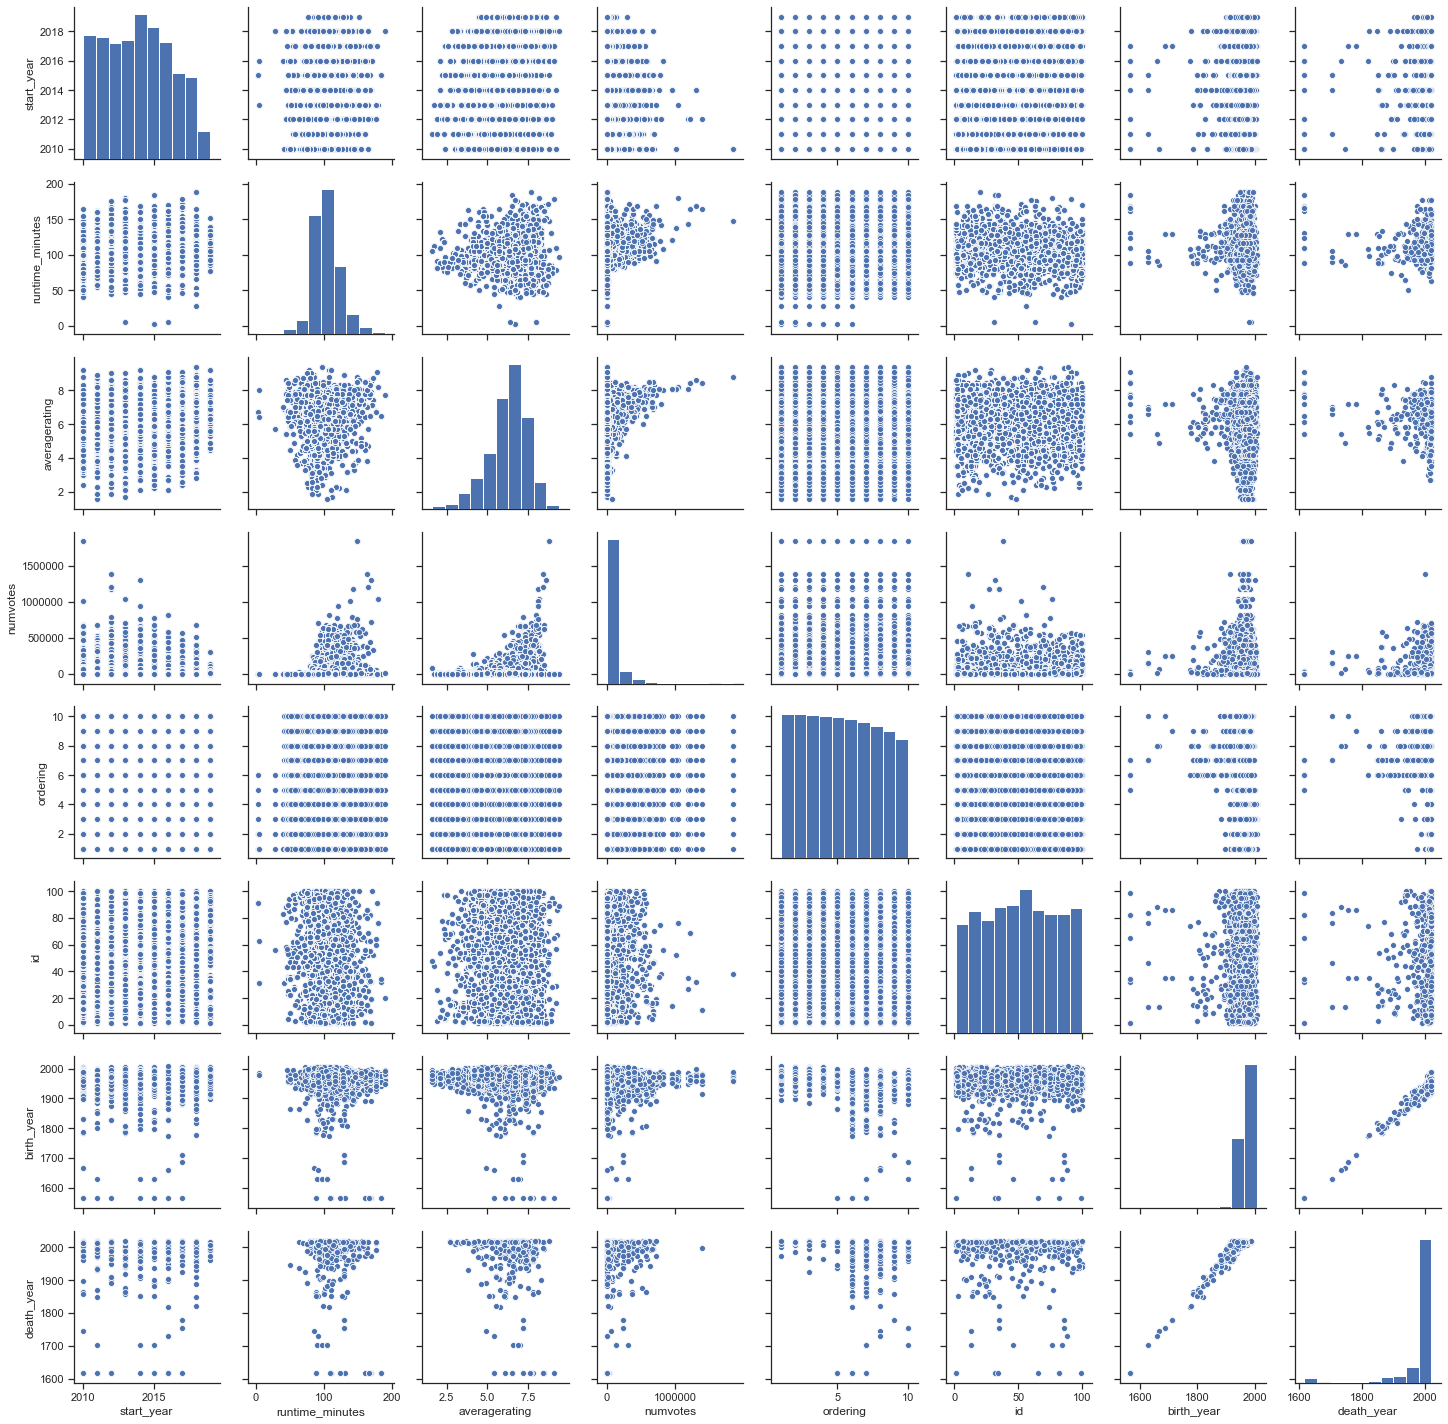

In [71]:
sns.pairplot(df_final)
plt.show()

In [84]:
#ax = df_final.plot.bar(y='runtime_minutes', rot=0)

# Deliverables
    (Presentation Software/Resource)
    -RISE (Jupyter plug in)
    -Reveal.js.slides (Jupyter notebook download option)
    -Canva
    -Power point
    -Google Slides
    
    (DOs and DON'Ts)
    -DO: Short text. (To keep the viewer attention)
    -DON'T: Small sentences
    -DO: Bonues Slides
    -DON'T
    -DO: Graphics
    -DON'T: Text
    -DON'T: Use feature names in presentation.
    -DO: Readme(Let them read the most important thing)